In [3]:
from tensorflow.keras.datasets.mnist import load_data

In [4]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# x_train[4], y_train[4]
x_train[50000], y_train[50000]

3


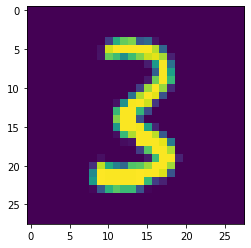

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[50000])
print(y_train[50000], type(y_train[50000]))

reshape를 통해 차원을 줄여줌

In [11]:
x_train = x_train.reshape(-1,28*28)
x_train.shape

(60000, 784)

In [12]:
x_test = x_test.reshape(-1, 28*28)
x_test.shape

(10000, 784)

In [14]:
y_train[2:10], y_train.shape

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

In [16]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# apply model

In [15]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape(784,))) # input layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
# 결과값 3개 이상 softmax 사용, 결과 binary --> sigmoid 사용
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output layer

model.compile()